In [15]:
# Adding the Packages
using Plots
using LinearAlgebra
gr()

Plots.GRBackend()

In [16]:
# Pauli Matrices
σx=[[0 1]
    [1 0]]
σy=[[0 -im]
    [im 0]]
σz=[[1 0]
    [0 -1]]

2×2 Matrix{Int64}:
 1   0
 0  -1

In [17]:
# Functions
Rx(k::Float64,v=1,w=2)=v-w*cos(k)
Ry(k::Float64,v=1,w=2)=-w*sin(k)

R(k::Float64,v=1,w=2)=sqrt(Rx(k,v,w)^2+Ry(k,v,w)^2)

H(k::Float64,v=1,w=2)=Rx(k,v,w)*σx+Ry(k,v,w)*σy

H (generic function with 3 methods)

In [18]:
# domain we will calculate on
l=314

ks=range(-π,stop=π,length=l)
dk=ks[2]-ks[1]

0.02007407446383258

In [19]:
k_test=rand()
σz*H(k_test)*σz^(-1)+H(k_test) # Should equal zero

2×2 Matrix{ComplexF64}:
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

In [20]:
# Parameters chosen to look at
va=[1.0, 0.5,1.0,  0.0,0.5,  0.4,0.6]
da=[0.0, 0.5,-0.5, 0.5,-0.5, 0.2,-0.2]

# w values corresponding to chosen ds
wa=round.(va+da;sigdigits=2) #Floating point error was making it print bad

# how to plot chosen parameters
colors=[colorant"#aa8e39",
    colorant"#592a71",colorant"#4e918f",
    colorant"#310c43",colorant"#226764",
    colorant"#cca7df",colorant"#a0d9d7",
    ]
styles=[:solid,
    :dash,:dash,
    :solid,:solid,
    :dot,:dot]
widths=[10,15,5,15,5,10,3];

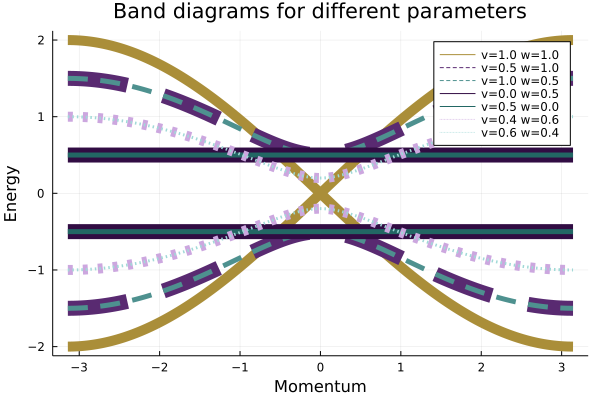

In [21]:
plot()
for ii in 1:length(va)
    plot!(ks,R.(ks,va[ii],wa[ii])
        ,label="v=$(va[ii]) w=$(wa[ii])"
        ,linewidth=widths[ii],color=colors[ii],linestyle=styles[ii])
    
    plot!(ks,-R.(ks,va[ii],wa[ii])
        ,label=""
        ,linewidth=widths[ii],color=colors[ii],linestyle=styles[ii])
end
plot!(title="Band diagrams for different parameters",
xlabel="Momentum",ylabel="Energy")

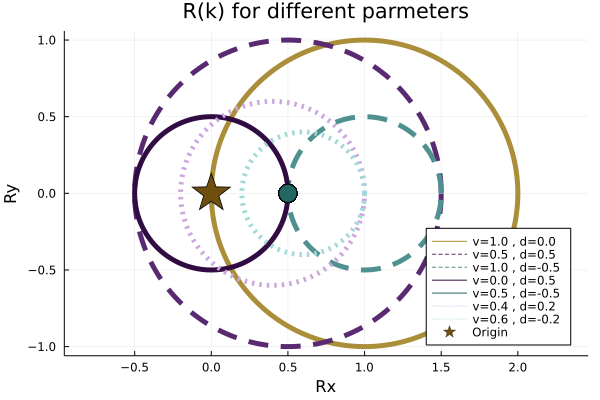

In [22]:
plot()
for ii in 1:length(va)
    plot!(Rx.(ks,va[ii],wa[ii]),
        Ry.(ks,va[ii],wa[ii])
    ,label="v=$(va[ii]) , d=$(da[ii])"
    ,linewidth=5,color=colors[ii],linestyle=styles[ii])
end

statval=5
scatter!(Rx.(ks,va[statval],wa[statval]),Ry.(ks,va[statval],wa[statval])
    ,label="",markersize=10,color=colors[statval])

scatter!([0],[0],label="Origin",
        markersize=20,markershape=:star5,color=colorant"#6f4f0d")

plot!(title="R(k) for different parmeters",
xlabel="Rx", ylabel="Ry",legend=:bottomright,aspect_ratio=1)

In [29]:
um1=-1/sqrt(2) 

function um2(k::Float64,v=1,w=2)
    return 1/(sqrt(2)*R(k,v,w))*(Rx(k,v,w)+im*Ry(k,v,w))
end

-0.7071067811865475

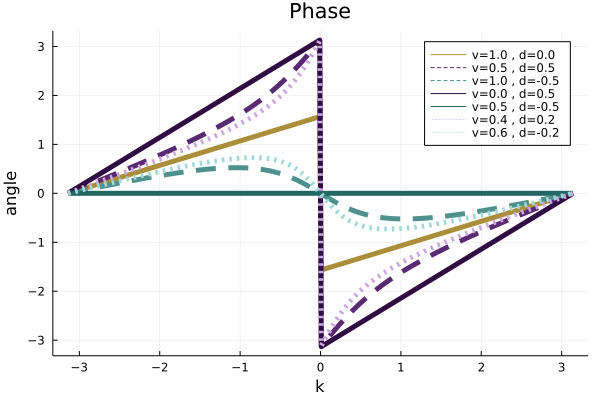

In [24]:
plot()
for ii in 1:length(va)
    plot!(ks,angle.(um2.(ks,va[ii],wa[ii]))
    ,label="v=$(va[ii]) , d=$(da[ii])",linewidth=5
    ,color=colors[ii],linestyle=styles[ii])
end
plot!(title="Phase",xlabel="k",ylabel="angle")

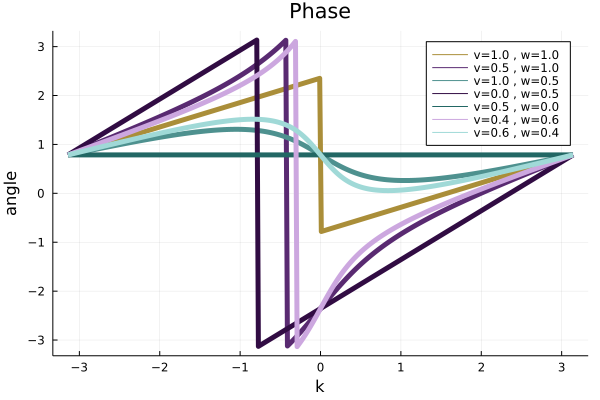

In [25]:
plot()
for ii in 1:length(va)
    plot!(ks,angle.(exp(im*π/4)*um2.(ks,va[ii],wa[ii]))
    ,label="v=$(va[ii]) , w=$(wa[ii])",linewidth=5
    ,color=colors[ii])
end
plot!(title="Phase",xlabel="k",ylabel="angle")

In [39]:
function Winding_phi(k,v,w)
    dum2=(um2.(k[2:end],v,w).-um2.(k[1:(end-1)],v,w))
    return 1/(2π*im)*sum(dum2./um2.(k[2:end],v,w) )
end
print(um2(1.))

LoadError: MethodError: no method matching um2(::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}, ::Float64, ::Float64)
[0mClosest candidates are:
[0m  um2([91m::Float64[39m, ::Any, ::Any) at In[29]:3
[0m  um2([91m::Float64[39m, ::Any) at In[29]:3

In [28]:
println("|Phase \t n \t| d \t v \t w |\t Real \t Imag")
for ii in 1:length(va)
    temp=Winding_phi(ks,va[ii],wa[ii])
    
    println("| ",sign(da[ii]),"\t",round(real(temp),digits=1),"\t|",
        da[ii],"\t",va[ii],"\t",wa[ii],"|\t",
        round(real(temp),digits=5),"\t",round(imag(temp),digits=5))
end

|Phase 	 n 	| d 	 v 	 w |	 Real 	 Imag
| 0.0	0.5	|0.0	1.0	1.0|	0.4968	-0.3208
| 1.0	1.0	|0.5	0.5	1.0|	0.99989	-0.01171
| -1.0	0.0	|-0.5	1.0	0.5|	1.0e-5	-0.00167
| 1.0	1.0	|0.5	0.0	0.5|	0.99993	-0.01004
| -1.0	0.0	|-0.5	0.5	0.0|	0.0	0.0
| 1.0	1.0	|0.2	0.4	0.6|	0.99982	-0.01405
| -1.0	0.0	|-0.2	0.6	0.4|	3.0e-5	-0.00401
